In [4]:
import json
import pathlib
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import sys
sys.path.append('..')
from attention.utils.paths import path_metadata, path_representations

In [5]:
plt.style.use('seaborn-bright')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
c = matplotlib.colors.colorConverter.to_rgba(colors[0], alpha=0.2)

In [7]:
path_Xraw = path_representations/'representations_mean.npy'
path_ind2desc = path_metadata/'imagenet_class_index.json'

In [8]:
Xraw = np.load(path_Xraw)
ind2desc = json.load(open(path_ind2desc))

## tSNE visualisation

In [5]:
Xtsne = {}
for p in range(10, 51, 10):
    Xtsne[p] = TSNE(perplexity=p, method='exact', n_iter=10000).fit_transform(Xraw)

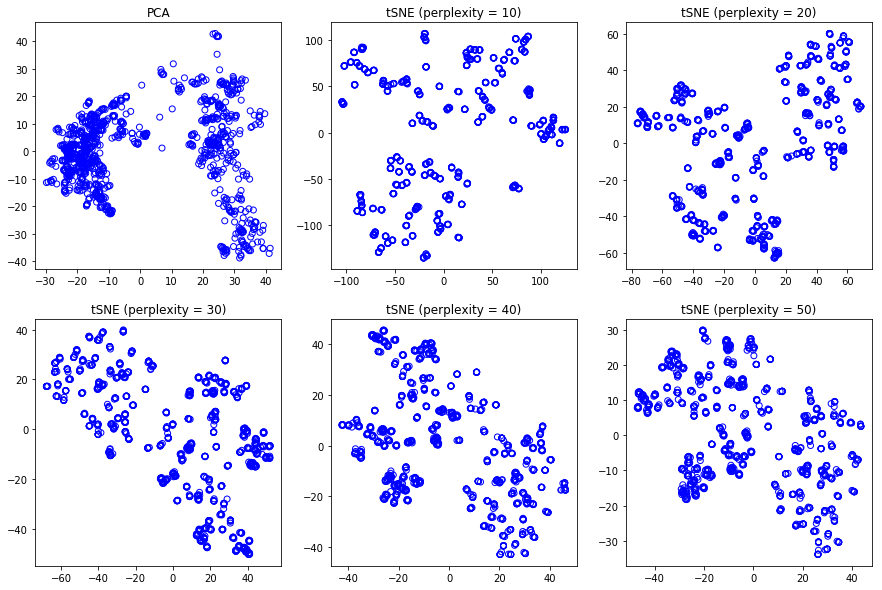

In [6]:
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15, 10))

axes[0, 0].scatter(Xpca2[:, 0], Xpca2[:, 1], facecolors='none', edgecolors='b')
axes[0, 0].set_title('PCA')

for i, p in enumerate(range(10, 51, 10)):
    X = Xtsne[p]
    j = np.unravel_index(i+1, dims=(2, 3))
    axes[j].scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='b')
    axes[j].set_title(f'tSNE (perplexity = {p})')
    
plt.show()

In [ ]:
x, y = Xtsne[30][:, 0], Xtsne[30][:, 1]

green: killer_whale dugong sea_lion Chihuahua Japanese_spaniel Maltese_dog Pekinese Shih-Tzu Blenheim_spaniel papillon toy_terrier Rhodesian_ridgeback Afghan_hound basset beagle bloodhound bluetick black-and-tan_coonhound Walker_hound English_foxhound redbone borzoi Irish_wolfhound

red: barracouta eel coho rock_beauty anemone_fish sturgeon gar balloon ballpoint Band_Aid banjo bannister barbell barber_chair bolo_tie bonnet bookcase bookshop bottlecap bow bow_tie


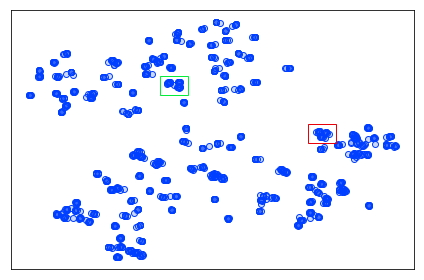

In [111]:
# inds = np.random.choice(np.arange(1000), size=100)
words = np.array([ind2desc[str(i)][1] for i in inds])

fig, ax = plt.subplots()
plt.scatter(x, y, facecolors=c, edgecolors=colors[0])

xlims = np.array([[-8, -2], [24, 30]])
ylims = np.array([[24, 34], [-1, 9]])

widths = [xlims[0, 1]-xlims[0, 0], xlims[1, 1]-xlims[1, 0]]
heights = [ylims[0, 1]-ylims[0, 0], ylims[1, 1]-ylims[1, 0]]
rect1 = Rectangle((xlims[0, 0], ylims[0, 0]), widths[0], heights[0], fill=False, edgecolor=colors[1])
rect2 = Rectangle((xlims[1, 0], ylims[1, 0]), widths[1], heights[1], fill=False, edgecolor=colors[2])

ax.add_patch(rect1)
ax.add_patch(rect2)

box_num = 0

inds = np.flatnonzero(
    (x > xlims[box_num, 0]) & (x < xlims[box_num, 1])
    & (y > ylims[box_num, 0]) & (y < ylims[box_num, 1]))
words = np.array([ind2desc[str(i)][1] for i in inds])

print('green:', *words)

box_num = 1

inds = np.flatnonzero(
    (x > xlims[box_num, 0]) & (x < xlims[box_num, 1])
    & (y > ylims[box_num, 0]) & (y < ylims[box_num, 1]))
words = np.array([ind2desc[str(i)][1] for i in inds])

print('\nred:', *words)

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('tsne.pdf')
plt.show()

indigo_bunting robin bulbul jay magpie chickadee water_ouzel kite bald_eagle vulture great_grey_owl European_fire_salamander common_newt eft spotted_salamander axolotl bullfrog tree_frog tailed_frog loggerhead leatherback_turtle


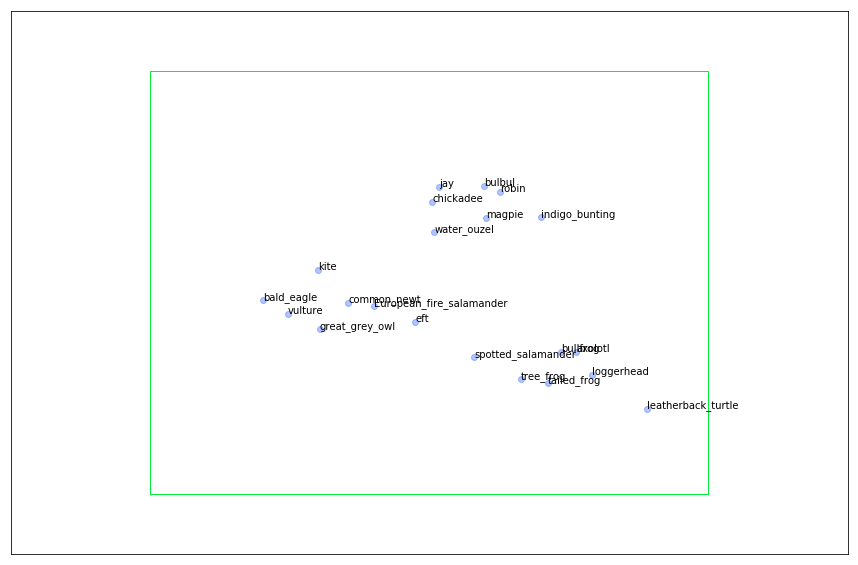

In [58]:
box_num = 0
colour = colors[1]

inds = np.flatnonzero(
    (x > xlims[box_num, 0]) * (x < xlims[box_num, 1])
    * (y > ylims[box_num, 0]) * (y < ylims[box_num, 1]))
words = np.array([ind2desc[str(i)][1] for i in inds])

print(*words)

fig, ax = plt.subplots(1, figsize=(15, 10))
# plt.scatter(x, y, facecolors='none', edgecolors='b')
plt.scatter(x, y, color=colors[0], alpha=0.3)

for i, word in enumerate(words):
    plt.text(x[inds[i]], y[inds[i]], word)

plt.xlim((xlims[box_num, 0]-1, xlims[box_num, 1]+1))
plt.ylim((ylims[box_num, 0]-1, ylims[box_num, 1]+1))
rect = Rectangle((xlims[box_num, 0], ylims[box_num, 0]), widths[box_num], heights[box_num], fill=False, edgecolor=colour)
ax.add_patch(rect)

plt.xticks([])
plt.yticks([])
plt.show()

barracouta eel coho rock_beauty anemone_fish sturgeon gar balloon ballpoint Band_Aid banjo bannister barbell barber_chair bolo_tie bonnet bookcase bookshop bottlecap bow bow_tie


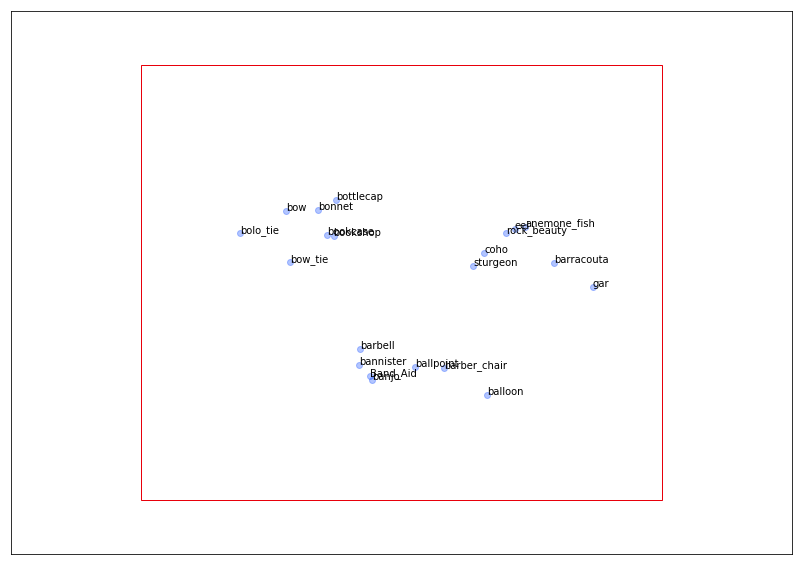

In [59]:
box_num = 1
colour = colors[2]

inds = np.flatnonzero(
    (x > xlims[box_num, 0]) * (x < xlims[box_num, 1])
    * (y > ylims[box_num, 0]) * (y < ylims[box_num, 1]))
words = np.array([ind2desc[str(i)][1] for i in inds])

print(*words)

fig, ax = plt.subplots(1, figsize=(14, 10))
# plt.scatter(x, y, facecolors='none', edgecolors='b')
plt.scatter(x, y, color=colors[0], alpha=0.3)

for i, word in enumerate(words):
    plt.text(x[inds[i]], y[inds[i]], word)
    
plt.xlim((xlims[box_num, 0]-1, xlims[box_num, 1]+1))
plt.ylim((ylims[box_num, 0]-1, ylims[box_num, 1]+1))
rect = Rectangle((xlims[box_num, 0], ylims[box_num, 0]), widths[box_num], heights[box_num], fill=False, edgecolor=colour)
ax.add_patch(rect)
plt.xticks([])
plt.yticks([])
plt.show()

## Principal-components analysis

Top 50 components explain 90% of variance


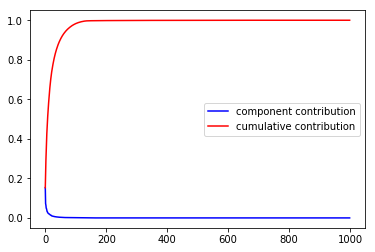

In [3]:
pca = PCA().fit(Xraw)
component_contrib = pca.explained_variance_ratio_
cumulative_contrib = np.cumsum(component_contrib)
plt.plot(component_contrib, label='component contribution', color='b')
plt.plot(cumulative_contrib, label='cumulative contribution', color='r')
plt.legend()
var = 90
print(f'Top {np.flatnonzero(cumulative_contrib>var/100)[0]+1}'
      f' components explain {var}% of variance')

In [4]:
top2_contrib = cumulative_contrib[1]
Xpca2 = PCA(n_components=2).fit_transform(Xraw)
print(f'Top 2 components explain {100*top2_contrib:.2f}% of variance')

Top 2 components explain 22.61% of variance
